In [425]:
import pyedflib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import scipy.signal
import FCAnalysis as fc
from mpl_toolkits.mplot3d  import Axes3D

In [194]:
plt.rcParams['font.sans-serif']=['SimHei']  #设置字体为黑米
plt.rcParams['axes.unicode_minus']=False    #设置可以显示负号

In [2]:
sampleFreq = fc.f.getSampleFrequency(1)
signalSam = fc.f.getNSamples()[1]
sigDur = fc.f.getFileDuration()

In [3]:
fc.n,sampleFreq,signalSam,sigDur

(129, 500, 451010, 902)

In [414]:
#10-400（发作间期），649（起始点）,654（关注点）,692（结束点）
# SOZ  #48与49有问题
s115_116 = fc.record[115]-fc.record[116]
s116_117 = fc.record[116]-fc.record[117]
s117_118 = fc.record[117]-fc.record[118]
s118_119 = fc.record[118]-fc.record[119]
# PP
s65_66 = fc.record[65]-fc.record[66]
s66_67 = fc.record[66]-fc.record[67]
s46_47 = fc.record[46]-fc.record[47]
s47_48 = fc.record[47]-fc.record[48]
#s48_49 = fc.record[48]-fc.record[49]
s49_50 = fc.record[49]-fc.record[50]
# NIZ
s1_2 = fc.record[1]-fc.record[2]
s4_5 = fc.record[4]-fc.record[5]
s104_105 = fc.record[104]-fc.record[105]
s105_106 = fc.record[105]-fc.record[106]
s106_107 = fc.record[106]-fc.record[107]
s120_121 = fc.record[120]-fc.record[121]
s121_122 = fc.record[121]-fc.record[122]
s122_123 = fc.record[122]-fc.record[123]

In [411]:
points_center = lambda p1,p2:[(p1[0]+p2[0])/2,(p1[1]+p2[1])/2,(p1[2]+p2[2])/2]

In [430]:
c115 = [-0.756950,-3.988354,6.734070]
c116 = [-0.956969 ,-3.941508 ,7.017439]
c117 = [-1.156988,-3.894662,7.300808]
c118 = [-1.357007,-3.847817,7.584177]
c119 = [3.578411, -3.141914, 4.459226]

ez_c = np.array([c115,c116,c117,c118,c119])

In [433]:
ez_c[:,0]

array([-0.75695 , -0.956969, -1.156988, -1.357007,  3.578411])

In [415]:
# SOZ  #48与49有问题
c115_116 = points_center([ -0.756950,-3.988354,6.734070],[-0.956969 ,-3.941508 ,7.017439])
c116_117 = points_center([-0.956969 ,-3.941508 ,7.017439],[-1.156988,-3.894662,7.300808])
c117_118 = points_center([-1.156988,-3.894662,7.300808],[-1.357007,-3.847817,7.584177])
c118_119 = points_center([-1.357007,-3.847817,7.584177],[3.578411, -3.141914, 4.459226])
# PP
c65_66 = points_center([1.541700, -3.124176, 4.535840],[1.589516, -3.470084, 4.559541])
c66_67 = points_center([1.589516, -3.470084, 4.559541],[1.637332, -3.815991, 4.583243])
c46_47 = points_center([4.099818, -2.494374, 2.839442],[4.118777, -2.815898, 2.976420])
c47_48 = points_center([4.118777, -2.815898, 2.976420],[4.137736, -3.137422, 3.113398])
#s48_49 = fc.record[48]-fc.record[49]
c49_50 = points_center([4.093, -3.529, 3.265],[4.082, -3.776, 3.375])
# NIZ
c1_2 = points_center([0.952870, -1.891982, 1.967772],[0.972635, -2.241205, 1.955419])
c4_5 = points_center([1.012164, -2.939651, 1.930713],[1.031928, -3.288874, 1.918360])
c104_105 = points_center([1.443258, -4.503657, 3.617012],[1.243239, -4.456811, 3.900381])
c105_106 = points_center([1.243239, -4.456811, 3.900381],[1.043220, -4.409965, 4.183750])
c106_107 = points_center([1.043220, -4.409965, 4.183750],[0.843201, -4.363120, 4.467119])
c120_121 = points_center([3.599030, -3.491292, 4.456011],[3.619649, -3.840669, 4.452796])
c121_122 = points_center([3.619649, -3.840669, 4.452796],[3.640268, -4.190046, 4.449581])
c122_123 = points_center([3.640268, -4.190046, 4.449581],[3.660887, -4.539424, 4.446365])

In [435]:
EPdistance(c115_116,c116_117),EPdistance(c116_117,c117_118),EPdistance(c115_116,c117_118)

(0.35000019748280115, 0.3500001305603331, 0.7000003280429589)

In [418]:
signal_ez_c = [c115_116,c116_117,c117_118,c118_119]

No handles with labels found to put in legend.


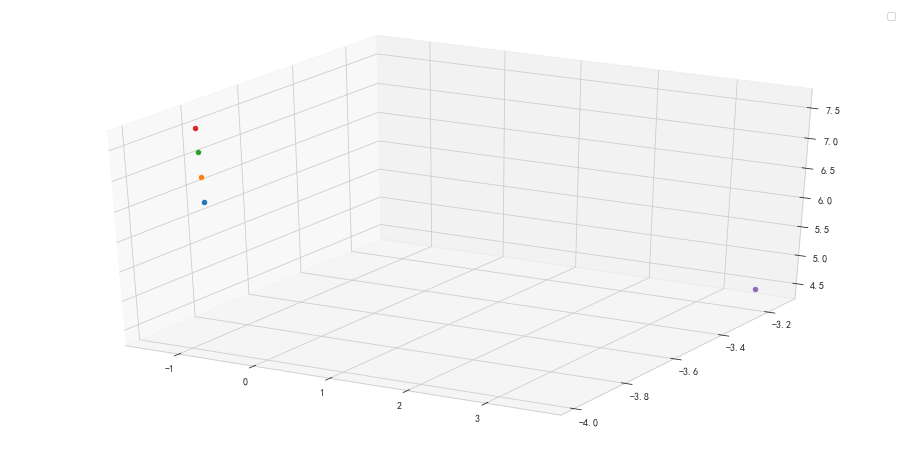

In [434]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')
for i in ez_c:
    ax.scatter(i[0],i[1],i[2])
plt.legend()

In [416]:
c115_116,c122_123

([-0.8569595, -3.964931, 6.8757545], [3.6505775, -4.364735, 4.447973])

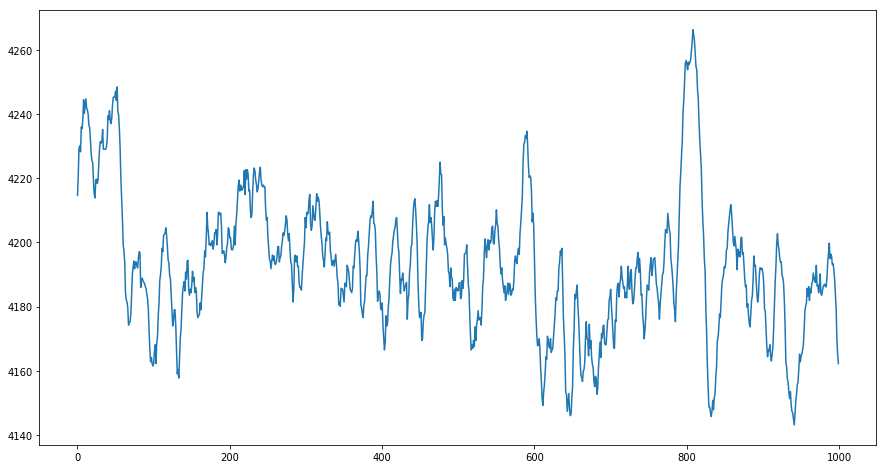

In [5]:
plt.figure(figsize=(15,8))
plt.plot(s115_116[:1000])

In [40]:
# SOZ区域内
h2_soz,lag_soz = fc.H2_filter([s115_116,s116_117,s117_118,s118_119],649,44,sampleFreq,maxlag=0.001)

In [33]:
h2_soz

[array([[0.        , 0.08903176, 0.06723366, 0.0697422 ],
        [0.09459058, 0.        , 0.02162162, 0.37030052],
        [0.05207669, 0.0818474 , 0.        , 0.32570128],
        [0.03439724, 0.37422832, 0.32223737, 0.        ]]),
 array([[0.        , 0.0299228 , 0.02610698, 0.10410884],
        [0.04343771, 0.        , 0.01462534, 0.29344647],
        [0.02980159, 0.05269611, 0.        , 0.18349111],
        [0.11369447, 0.28577019, 0.16233335, 0.        ]]),
 array([[0.        , 0.01832347, 0.03847204, 0.06734742],
        [0.02825494, 0.        , 0.03069142, 0.13947217],
        [0.00995999, 0.02650372, 0.        , 0.11237909],
        [0.08115645, 0.10893045, 0.10445971, 0.        ]]),
 array([[0.        , 0.07967568, 0.08008958, 0.0763438 ],
        [0.03488246, 0.        , 0.13310535, 0.06646508],
        [0.08063059, 0.14015219, 0.        , 0.19368067],
        [0.10087347, 0.10109208, 0.16132632, 0.        ]]),
 array([[0.        , 0.03513459, 0.19510715, 0.13645652],
      

In [355]:
def H2_max(h2,lag,s1=0,s2=1):
    '''
    返回这组信号中s1与s2的最终h2（最大值）及其对应的时间延迟
    s1,s2代表数字，如 0,3
    '''
    pnum = len(h2) # 时间点的数量
    h2_max=[None]*pnum
    lag_max=[None]*pnum
    for pi in range(pnum):
        if h2[pi][s1,s2] >= h2[pi][s2,s1]:
            h2_max[pi] = h2[pi][s1,s2]
            lag_max[pi] = lag[pi][s1,s2]
        else:
            h2_max[pi] = h2[pi][s2,s1]
            lag_max[pi] = lag[pi][s2,s1]
    return h2_max,lag_max

In [16]:
interval=lambda min,max,N:np.linspace(min,max,N)
def fmat(li):
    '''
    li中的元素保留一位有效数字
    '''
    for i in range(len(li)):
        li[i]=round(li[i],1)
    return li

In [44]:
s115_116s116_117sz = H2_max(h2_soz,lag_soz,0,1)[0]

In [49]:
np.linspace(0,42,22)

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
       26., 28., 30., 32., 34., 36., 38., 40., 42.])

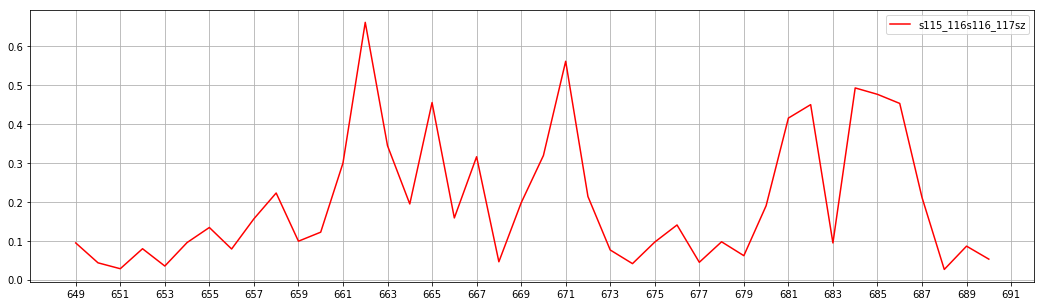

In [46]:
plt.figure(figsize=(18,5))
plt.plot(s115_116s116_117sz,'r',label="s115_116s116_117sz")
plt.xticks(np.linspace(0,42,22),np.linspace(649,649+42,22,dtype=int))
plt.legend()
plt.grid()

In [50]:
h2_soz,lag_soz = fc.H2_filter([s115_116,s116_117,s117_118,s118_119],649,45,sampleFreq,maxlag=0.001)

In [51]:
s115_116s116_117sz = H2_max(h2_soz,lag_soz,0,1)[0]

In [100]:
ez = []
for i in range(3):
    for j in range(i+1,4):
        ez.append(H2_max(h2_soz,lag_soz,i,j)[0])

In [56]:
len(ez)

6

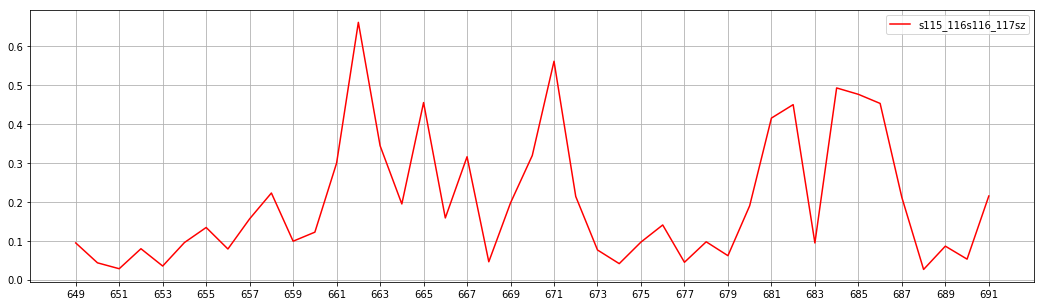

In [52]:
plt.figure(figsize=(18,5))
plt.plot(s115_116s116_117sz,'r',label="s115_116s116_117sz")
plt.xticks(np.linspace(0,42,22),np.linspace(649,649+42,22,dtype=int))
plt.legend()
plt.grid()

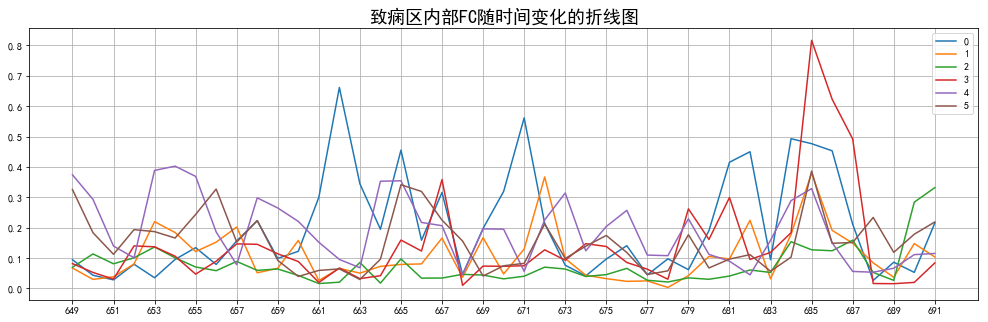

In [80]:
plt.figure(figsize=(17,5))
for i in range(6):
    plt.plot(ez[i],label=i)
plt.xticks(np.linspace(0,42,22),np.linspace(649,649+42,22,dtype=int))
plt.legend()
plt.title('致痫区内部FC随时间变化的折线图',fontsize=18)
plt.grid()

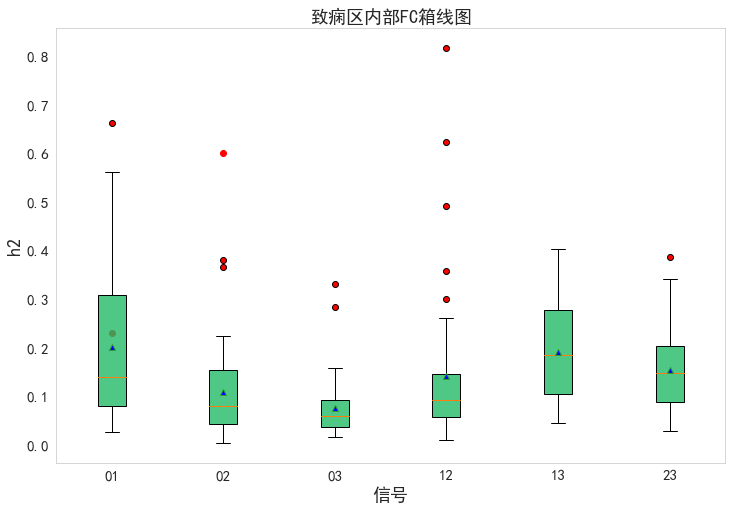

In [315]:
plt.figure(figsize=(12,8))
plt.boxplot([ez[0],ez[1],ez[2],ez[3],ez[4],ez[5]],labels=['01','02','03','12','13','23'],widths=0.25, #vert=False,vert：将图像倒过来
            patch_artist=True,boxprops={'color':'k','facecolor':'#22bb66cc'},showmeans=True,
            meanprops={'markerfacecolor':'b'},
            flierprops={'marker':'o','markerfacecolor':'r','color':'k'})
plt.scatter([1,2],[0.23,0.6],color='r')
ax=plt.gca() #获取当前坐标轴
#ax.patch.set_facecolor('yellow') # 设置坐标轴的背景颜色
#ax.patch.set_alpha(0.1)  # 设置坐标轴背景颜色的透明度

plt.title('致痫区内部FC箱线图',fontsize=18)
plt.tick_params(labelsize=15)
plt.xlabel("信号",fontsize=18)
plt.ylabel("h2",fontsize=18)
plt.grid()
plt.show()

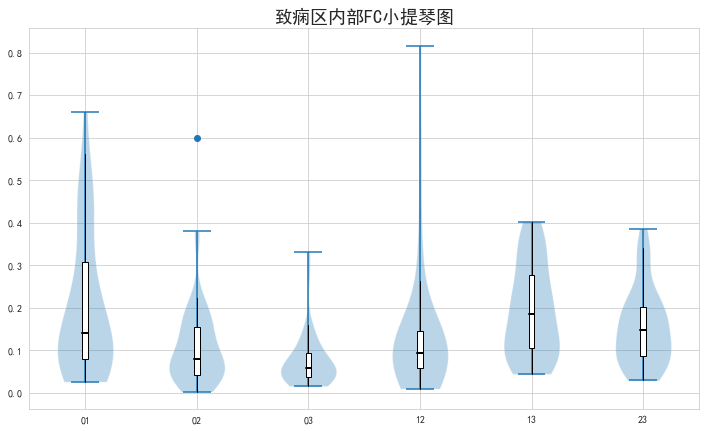

In [307]:
plt.figure(figsize=(12,7))
plt.violinplot(ez) # data里是元素（如data1）还不允许是Series
plt.boxplot(ez,widths=0.05,patch_artist=True,boxprops={'color':'k','facecolor':'w'},showcaps=False,\
            showmeans=False,meanprops={'markerfacecolor':'b'},showfliers=False,medianprops={'color':'k','linewidth':2})
ax=plt.gca()
ax.yaxis.grid(True)
plt.title('致痫区内部FC小提琴图',fontsize=18)
plt.xticks([y+1 for y in range(len(ez))],['01','02','03','12','13','23'])  # 只能这么设置label
ax.scatter([1,2],[0.2,0.6])
plt.show()

In [75]:
np.median(ez[0]),np.median(ez[3]),np.median(ez)

(0.14074387382672904, 0.09297950631572094, 0.10345494476636602)

In [74]:
np.median([np.median(ez[0]),np.median(ez[1]),np.median(ez[2]),np.median(ez[3]),np.median(ez[4]),np.median(ez[5])])

0.11686169007122499

In [77]:
(np.median(ez[0])+np.median(ez[3]))/2

0.11686169007122499

In [81]:
h2_pz,lag_pz = fc.H2_filter([s46_47,s49_50,s65_66,s66_67],649,45,sampleFreq,maxlag=0.001)

In [84]:
pz = []
for i in range(3):
    for j in range(i+1,4):
        pz.append(H2_max(h2_pz,lag_pz,i,j)[0])

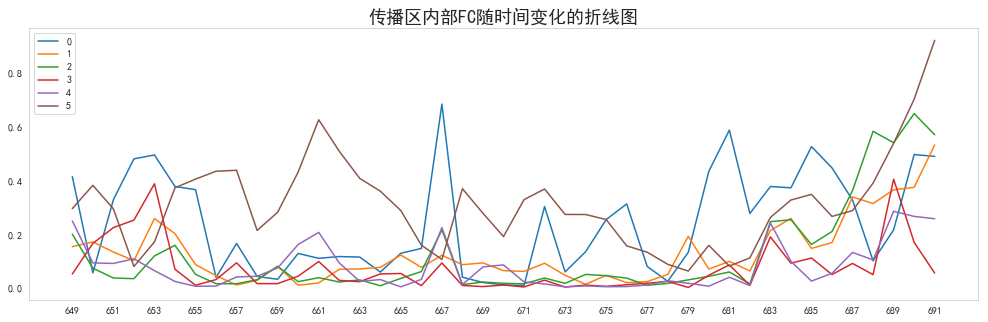

In [98]:
plt.figure(figsize=(17,5))
for i in range(6):
    plt.plot(pz[i],label=i)
plt.xticks(np.linspace(0,42,22),np.linspace(649,649+42,22,dtype=int))
plt.legend()
plt.title('传播区内部FC随时间变化的折线图',fontsize=18)
plt.grid()

In [86]:
import seaborn as sns

ValueError: Input data must be a pandas object to reorder

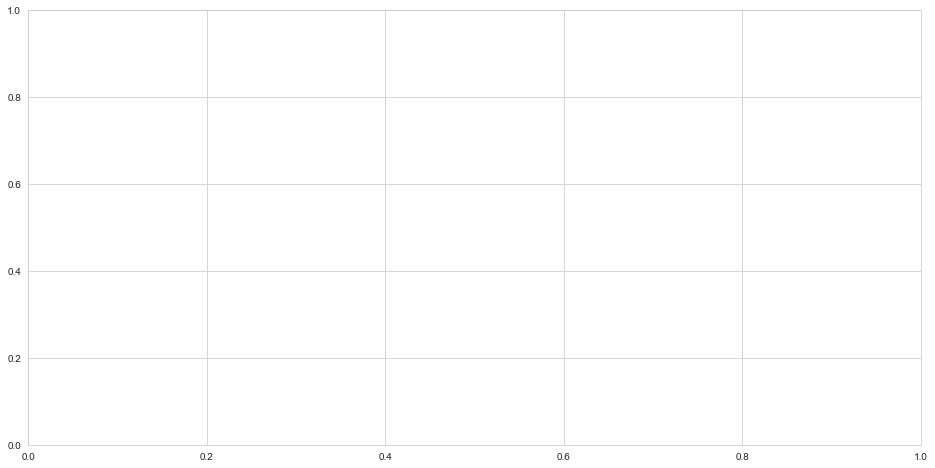

In [89]:
sns.set_style("whitegrid")
f, ax = plt.subplots(1, 1, sharey=True, figsize=(16, 8))
sns.violinplot(data = pz,order = {'01','02','03','12','13','23'})
sns.plot(data = pz,color = 'w', order = {'01','02','03','12','13','23'},alpha = .6) #配合散点图

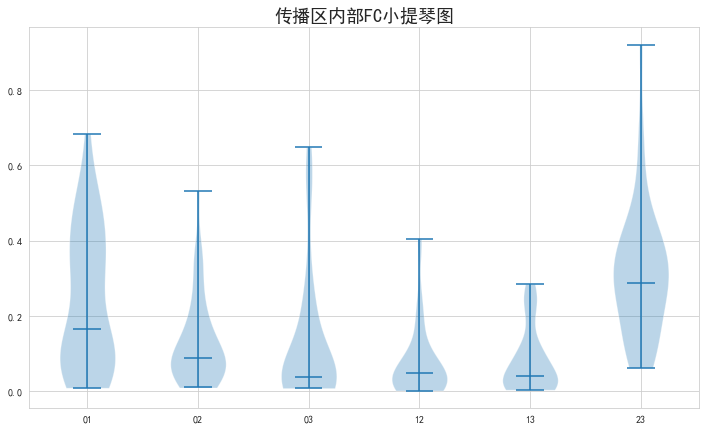

In [99]:
plt.figure(figsize=(12,7))
plt.violinplot(pz,showmedians=True) # data里是元素（如data1）还不允许是Series
#plt.scatter('01',pz[0])
ax=plt.gca()
ax.yaxis.grid(True)
plt.title('传播区内部FC小提琴图',fontsize=18)
plt.xticks([y+1 for y in range(len(pz))],['01','02','03','12','13','23'])  # 只能这么设置label
plt.show()

In [102]:
np.median([np.median(pz[0]),np.median(pz[1]),np.median(pz[2]),np.median(pz[3]),np.median(pz[4]),np.median(pz[5])])

0.06725349867485325

In [103]:
h2_niz,lag_niz = fc.H2_filter([s104_105,s106_107,s120_121,s122_123],649,45,sampleFreq,maxlag=0.001)

In [122]:
niz = []
for i in range(3):
    for j in range(i+1,4):
        niz.append(H2_max(h2_niz,h2_niz,i,j)[0])

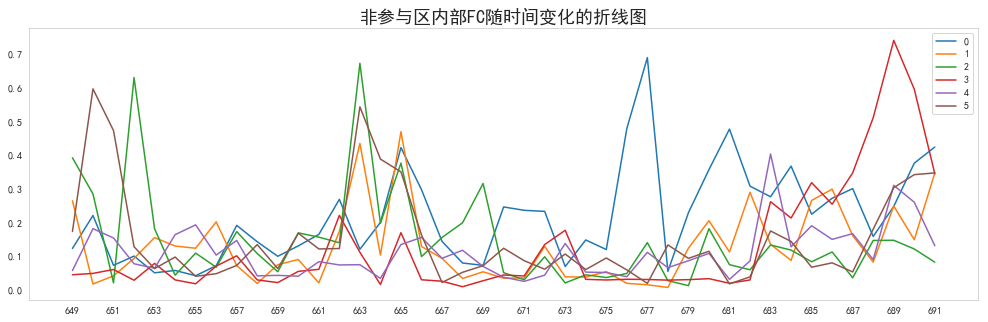

In [123]:
plt.figure(figsize=(17,5))
for i in range(6):
    plt.plot(niz[i],label=i)
plt.xticks(np.linspace(0,42,22),np.linspace(649,649+42,22,dtype=int))
plt.legend()
plt.title('非参与区内部FC随时间变化的折线图',fontsize=18)
plt.grid()

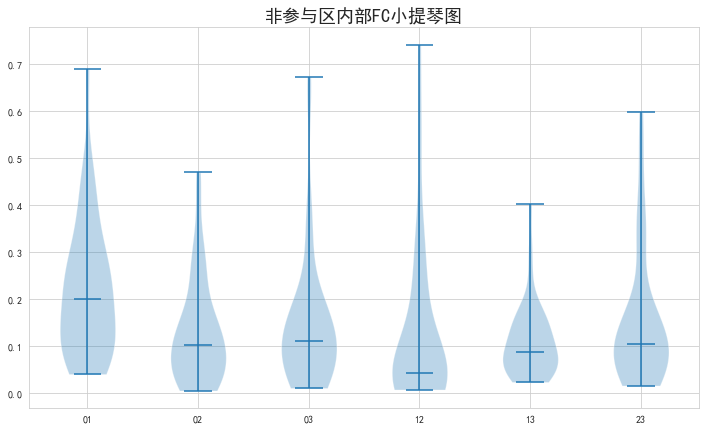

In [133]:
plt.figure(figsize=(12,7))
plt.violinplot(niz,showmedians=True) # data里是元素（如data1）还不允许是Series
#plt.scatter('01',pz[0])
ax=plt.gca()
ax.yaxis.grid(True)
plt.title('非参与区内部FC小提琴图',fontsize=18)
plt.xticks([y+1 for y in range(len(niz))],['01','02','03','12','13','23'])  # 只能这么设置label
plt.show()

In [107]:
np.median([np.median(niz[0]),np.median(niz[1]),np.median(niz[2]),np.median(niz[3]),np.median(niz[4]),np.median(niz[5])])

0.10337823968265475

In [108]:
h2_niz2,lag_niz2 = fc.H2_filter([s1_2,s4_5,s104_105,s122_123],649,45,sampleFreq,maxlag=0.001)

In [125]:
niz2 = []
for i in range(3):
    for j in range(i+1,4):
        niz2.append(H2_max(h2_niz2,h2_niz2,i,j)[0])

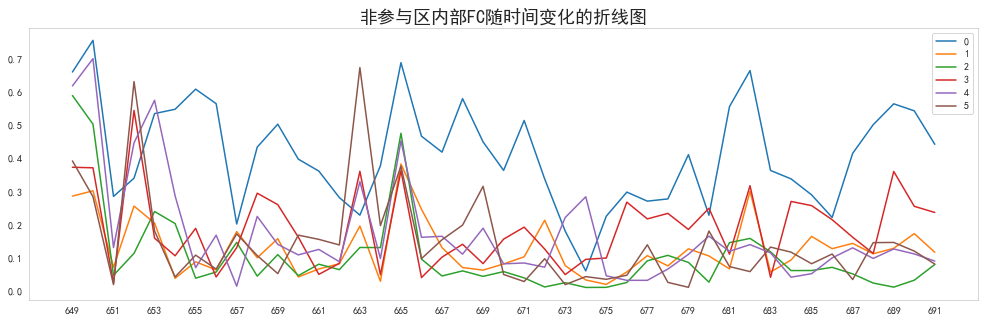

In [126]:
plt.figure(figsize=(17,5))
for i in range(6):
    plt.plot(niz2[i],label=i)
plt.xticks(np.linspace(0,42,22),np.linspace(649,649+42,22,dtype=int))
plt.legend()
plt.title('非参与区内部FC随时间变化的折线图',fontsize=18)
plt.grid()

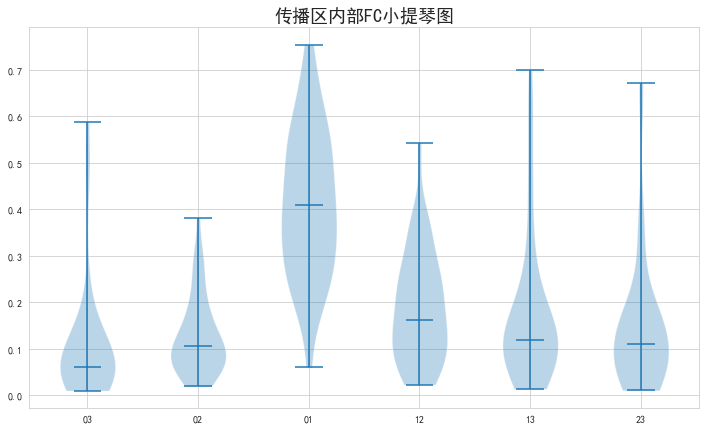

In [170]:
plt.figure(figsize=(12,7))
plt.violinplot(niz2,showmedians=True,positions = [3, 2, 1,4,5,6]) # data里是元素（如data1）还不允许是Series
#plt.scatter('01',pz[0])
ax=plt.gca()
ax.yaxis.grid(True)
plt.title('传播区内部FC小提琴图',fontsize=18)
plt.xticks([3, 2, 1,4,5,6],['01','02','03','12','13','23'])  # 只能这么设置label
plt.show()

In [118]:
def h2_median(h2_value):
    sub_median=[]
    for i in range(len(h2_value)):
        sub_median.append(np.median(h2_value[i]))
    return np.median(sub_median)

In [132]:
h2_median(niz)

0.10337823968265475

In [131]:
h2_median(niz2)                                          

0.1151932086177907

In [134]:
import scipy.io as sio

In [139]:
sio.savemat("zhaoyunfengIn.mat",{"method":"h2","windowSize":2,"step":1,"maxLag":0,"HP":0,"LP":0,\
                                 "start":649,"duration":45,"samplingRate":sigDur,'time_s':range(649,692),\
                                 'EZ_electrode_names':['s115_116','s116_117','s117_118','s118_119'],"EZ_h2":ez,"EZ_median":h2_median(ez),\
                                 'PZ_electrode_names':['s46_47','s49_50','s65_66','s66_67'],"PZ_h2":pz,"PZ_median":h2_median(pz),\
                                 'NIZ_electrode_names':['s104_105','s106_107','s120_121','s122_123'],"NIZ_h2":niz,"NIZ_median":h2_median(niz),\
                                })

In [140]:
read_data = sio.loadmat("zhaoyunfengIn.mat")

In [141]:
read_data

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Wed Apr  3 13:52:51 2019',
 '__version__': '1.0',
 '__globals__': [],
 'method': array(['h2'], dtype='<U2'),
 'windowSize': array([[2]]),
 'step': array([[1]]),
 'maxLag': array([[0]]),
 'HP': array([[0]]),
 'LP': array([[0]]),
 'start': array([[649]]),
 'duration': array([[45]]),
 'samplingRate': array([[902]]),
 'time_s': array([[649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661,
         662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674,
         675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687,
         688, 689, 690, 691]]),
 'EZ_electrode_names': array(['s115_116', 's116_117', 's117_118', 's118_119'], dtype='<U8'),
 'EZ_h2': array([[0.09459058, 0.04343771, 0.02825494, 0.07967568, 0.0351674 ,
         0.09554548, 0.13429976, 0.07901916, 0.15657271, 0.22294454,
         0.09903162, 0.12226625, 0.29992545, 0.66168991, 0.34451319,
         0.19478584, 0.4554656 , 0.15884037, 0.31

In [145]:
np.median(ez),np.median(pz),np.median(niz),read_data['EZ_h2'].shape,['pz']*3

(0.10345494476636602,
 0.09206146598913639,
 0.10731867080921631,
 (6, 43),
 ['pz', 'pz', 'pz'])

In [175]:
df = pd.DataFrame(read_data['EZ_h2'].reshape(read_data['EZ_h2'].size,1),columns=['EZ'])

In [179]:

df["EZ_signals"]=[int(i/43) for i in range(len(df))]

In [184]:
df[df.EZ>0.65]

,EZ,EZ_signals
13,0.661690,0
165,0.816858,3


In [180]:
df

,EZ,EZ_signals
0,0.094591,0
1,0.043438,0
2,0.028255,0
3,0.079676,0
4,0.035167,0
5,0.095545,0
6,0.134300,0
7,0.079019,0
8,0.156573,0
9,0.222945,0


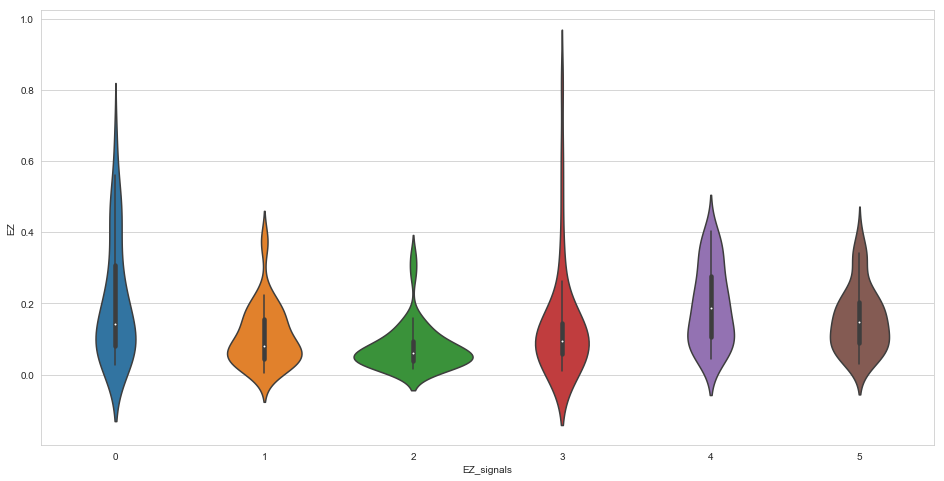

In [188]:
sns.set_style("whitegrid")
f, ax = plt.subplots(1, 1, sharey=True, figsize=(16, 8))
ax = sns.violinplot(x="EZ_signals",y="EZ",,data=df,ax=ax)

In [268]:
ez_gather = read_data['EZ_h2'].reshape(read_data['EZ_h2'].size,)
pz_gather = read_data['PZ_h2'].reshape(read_data['PZ_h2'].size,)
niz_gather = read_data['NIZ_h2'].reshape(read_data['NIZ_h2'].size,)

In [309]:
read_data['EZ_median'].reshape(1,)

array([0.11686169])

In [269]:
ez_gather

array([0.09459058, 0.04343771, 0.02825494, 0.07967568, 0.0351674 ,
       0.09554548, 0.13429976, 0.07901916, 0.15657271, 0.22294454,
       0.09903162, 0.12226625, 0.29992545, 0.66168991, 0.34451319,
       0.19478584, 0.4554656 , 0.15884037, 0.31618189, 0.04612984,
       0.19755242, 0.31929478, 0.56165198, 0.21389471, 0.07646827,
       0.04134263, 0.0968212 , 0.14074387, 0.04482932, 0.09750696,
       0.06179921, 0.19021632, 0.41555854, 0.45013013, 0.09455004,
       0.49306587, 0.47664319, 0.45323537, 0.21153721, 0.02641416,
       0.08632303, 0.0529193 , 0.21528159, 0.06723366, 0.02980159,
       0.03847204, 0.08063059, 0.21990659, 0.18409587, 0.12143942,
       0.15241977, 0.20210464, 0.05145544, 0.06656466, 0.15809392,
       0.0261755 , 0.06587739, 0.05044232, 0.07269695, 0.07907137,
       0.08078224, 0.16584484, 0.03683022, 0.16720872, 0.04768285,
       0.1296623 , 0.36715406, 0.09835199, 0.0437129 , 0.03222551,
       0.02340926, 0.02480684, 0.00329331, 0.04209645, 0.10538

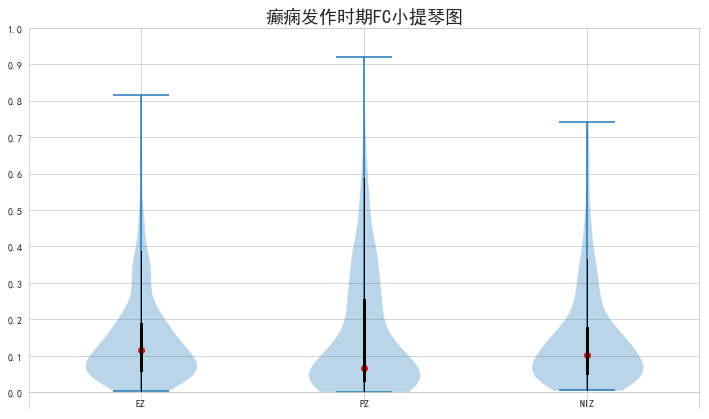

In [322]:
plt.figure(figsize=(12,7))
plt.violinplot([ez_gather,pz_gather,niz_gather]) # data里是元素（如data1）还不允许是Series
plt.boxplot([ez_gather,pz_gather,niz_gather],widths=0.01,patch_artist=True,boxprops={'color':'k','facecolor':'k'},showcaps=False,\
             showmeans=False,meanprops={'markerfacecolor':'b'},showfliers=False,medianprops={'color':'k'})
plt.scatter(range(1,4),[read_data['EZ_median'][0][0],read_data['PZ_median'][0][0],read_data['NIZ_median'][0][0]],color='r')
#plt.scatter('01',pz[0])
ax=plt.gca()
ax.spines['bottom'].set_position(('data',0)) 
plt.title('癫痫发作时期FC小提琴图',fontsize=18)
plt.xticks([y+1 for y in range(3)],['EZ','PZ','NIZ'])  # 只能这么设置label
plt.yticks([y/10 for y in range(11)]) 
plt.show()

In [349]:
h2_ez_pz_t0_1,lag_ez_pz_t0_1 = fc.H2_filter([s115_116,s65_66],649,45,sampleFreq,maxlag=0.001)
h2_ez_pz_t0_2,lag_ez_pz_t0_2 = fc.H2_filter([s116_117,s66_67],649,45,sampleFreq,maxlag=0.001)
h2_ez_pz_t0_3,lag_ez_pz_t0_3 = fc.H2_filter([s117_118 ,s46_47 ],649,45,sampleFreq,maxlag=0.001)
h2_ez_pz_t0_4,lag_ez_pz_t0_4 = fc.H2_filter([s118_119 ,s49_50 ],649,45,sampleFreq,maxlag=0.001)

In [354]:
H2_filter = fc.H2_filter

In [369]:
def H2_bwt(zone1,zone2,start_time,duration,sampleFreq,slideWindow=2,step=1,maxlag=0.1,L=7,HP=0,LP=0):
    h2_bwt=[]
    h2_bwt_max=[]
    h2_bwt_median=[]
    for i in range(len(zone1)):
        h2_bwt.append(H2_filter([zone1[i],zone2[i]],start_time,duration,sampleFreq,slideWindow,step,maxlag,L,HP,LP))
        h2_bwt_max.append(H2_max(h2_bwt[i][0],h2_bwt[i][1]))
        h2_bwt_median.append(np.median(h2_bwt_max[i][0]))
        
    return h2_bwt,h2_bwt_max,h2_bwt_median,np.median(h2_bwt_median)

In [417]:
def H2_bwt_cod(zone1,zone2,cod1,cod2,start_time,duration,sampleFreq,slideWindow=2,step=1,maxlag=0.1,L=7,HP=0,LP=0):
    h2_bwt=[]
    h2_bwt_max=[]
    h2_bwt_median=[]
    codistance = []
    for i in range(len(zone1)):
        h2_bwt.append(H2_filter([zone1[i],zone2[i]],start_time,duration,sampleFreq,slideWindow,step,maxlag,L,HP,LP))
        h2_bwt_max.append(H2_max(h2_bwt[i][0],h2_bwt[i][1]))
        h2_bwt_median.append(np.median(h2_bwt_max[i][0]))
        codistance.append(EPdistance(cod1[i],cod2[i]))
    return h2_bwt,h2_bwt_max,h2_bwt_median,np.median(h2_bwt_median),codistance

In [370]:
ez_pz_t0_2 = H2_bwt([s115_116,s116_117,s117_118,s118_119],[s46_47,s47_48,s49_50,s46_47],649,45,sampleFreq,maxlag=0.001)

In [383]:
len(ez_pz_t0_2[1][0][0])

43

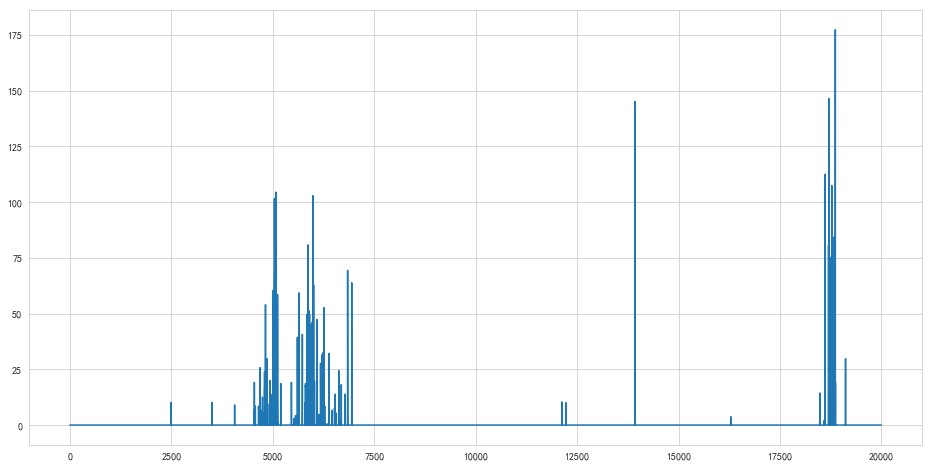

In [367]:
plt.figure(figsize=(16,8))
plt.plot(s48_49[649*500:(649+40)*500])

In [350]:
ez_pz_t0_1 = H2_max(h2_ez_pz_t0_1,lag_ez_pz_t0_1,0,1)[0]
ez_pz_t0_2 = H2_max(h2_ez_pz_t0_2,lag_ez_pz_t0_2,0,1)[0]
ez_pz_t0_3 = H2_max(h2_ez_pz_t0_3,lag_ez_pz_t0_3,0,1)[0]
ez_pz_t0_4 = H2_max(h2_ez_pz_t0_4,lag_ez_pz_t0_4,0,1)[0]

In [351]:
ez_pz_t0=[ez_pz_t0_1,ez_pz_t0_2,ez_pz_t0_3,ez_pz_t0_4]

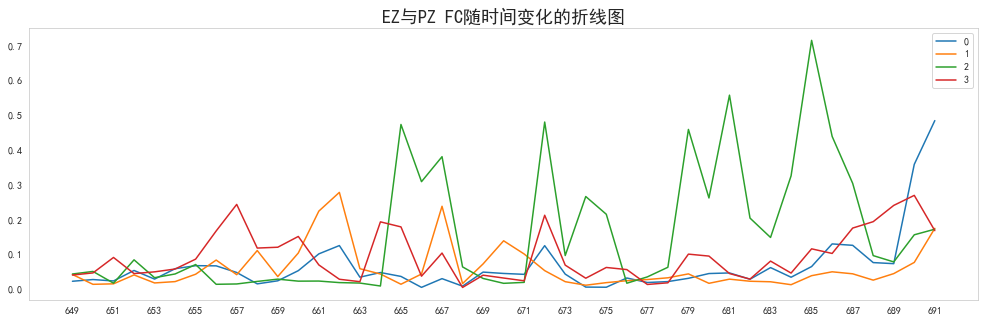

In [374]:
plt.figure(figsize=(17,5))
for i in range(len(ez_pz_t0)):
    plt.plot(ez_pz_t0[i],label=i)
plt.xticks(np.linspace(0,42,22),np.linspace(649,649+42,22,dtype=int))
plt.legend()
plt.title('EZ与PZ FC随时间变化的折线图',fontsize=18)
plt.grid()

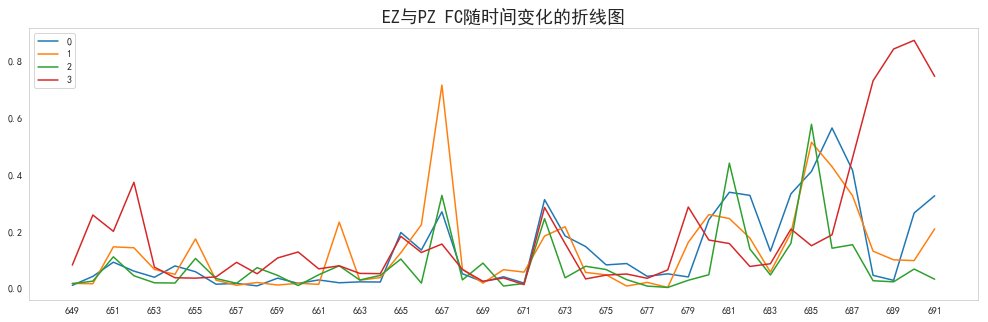

In [384]:
plt.figure(figsize=(17,5))
for i in range(len(ez_pz_t0_2[1])):
    plt.plot(ez_pz_t0_2[1][i][0],label=i)
plt.xticks(np.linspace(0,42,22),np.linspace(649,649+42,22,dtype=int))
plt.legend()
plt.title('EZ与PZ FC随时间变化的折线图',fontsize=18)
plt.grid()

In [389]:
ez_pz_t0_2[3]

0.06141064920922229

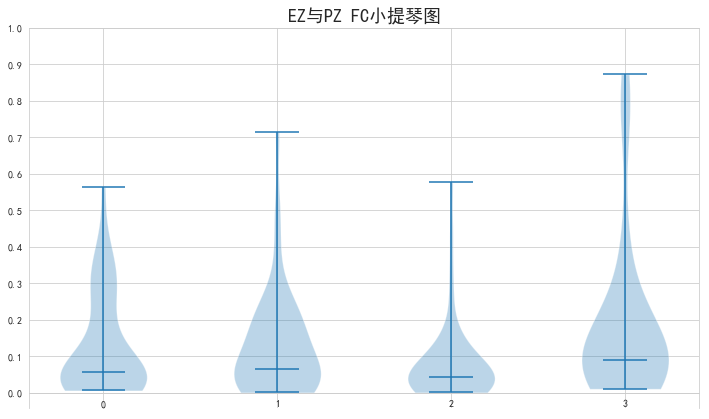

In [391]:
plt.figure(figsize=(12,7))
plt.violinplot([ez_pz_t0_2[1][0][0],ez_pz_t0_2[1][1][0],ez_pz_t0_2[1][2][0],ez_pz_t0_2[1][3][0]],showmedians=True) # data里是元素（如data1）还不允许是Series
#plt.scatter('01',pz[0])
ax=plt.gca()
ax.spines['bottom'].set_position(('data',0)) 
plt.title('EZ与PZ FC小提琴图',fontsize=18)
plt.xticks(range(1,5),['0','1','2','3'])  # 只能这么设置label
plt.yticks([i/10 for i in range(0,11)])
plt.show()

In [341]:
h2_ez_pz_t1_1,lag_ez_pz_t1_1 = fc.H2_filter([s115_116,s65_66],649,45,sampleFreq,maxlag=0.1)

In [347]:
ez_pz_t1_1 = H2_max(h2_ez_pz_t1_1,lag_ez_pz_t1_1,0,1)[0]

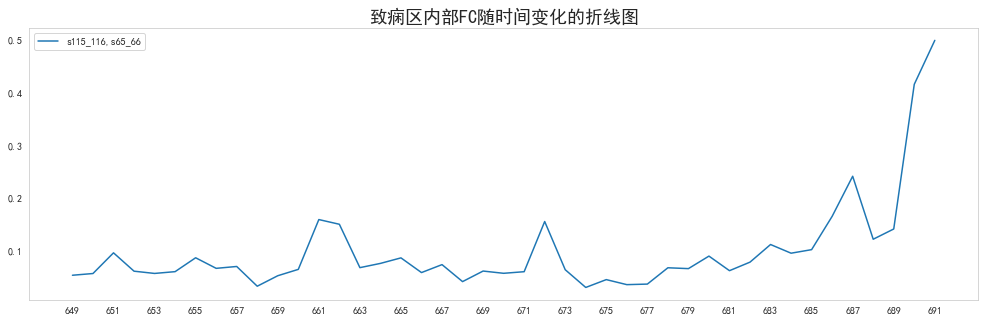

In [348]:
plt.figure(figsize=(17,5))
plt.plot(ez_pz_t1_1,label="s115_116,s65_66")
plt.xticks(np.linspace(0,42,22),np.linspace(649,649+42,22,dtype=int))
plt.legend()
plt.title('致痫区内部FC随时间变化的折线图',fontsize=18)
plt.grid()

In [393]:
ez_niz_t0_1 = H2_bwt([s115_116,s116_117,s117_118,s118_119],[s104_105 ,s105_106 ,s106_107 ,s104_105],649,45,sampleFreq,maxlag=0.001)

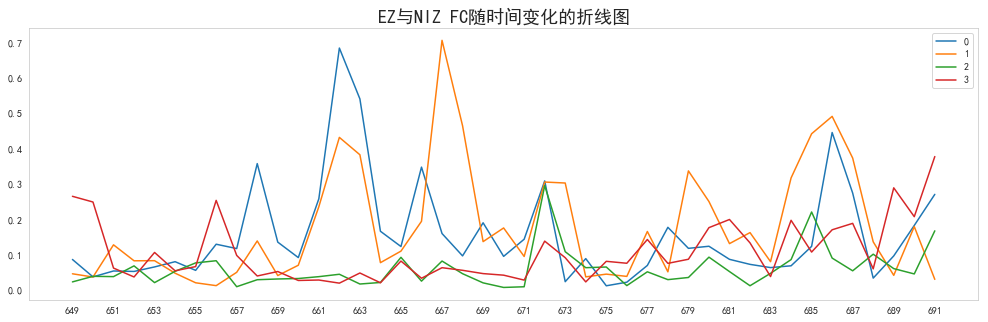

In [394]:
plt.figure(figsize=(17,5))
for i in range(len(ez_niz_t0_1[1])):
    plt.plot(ez_niz_t0_1[1][i][0],label=i)
plt.xticks(np.linspace(0,42,22),np.linspace(649,649+42,22,dtype=int))
plt.legend()
plt.title('EZ与NIZ FC随时间变化的折线图',fontsize=18)
plt.grid()

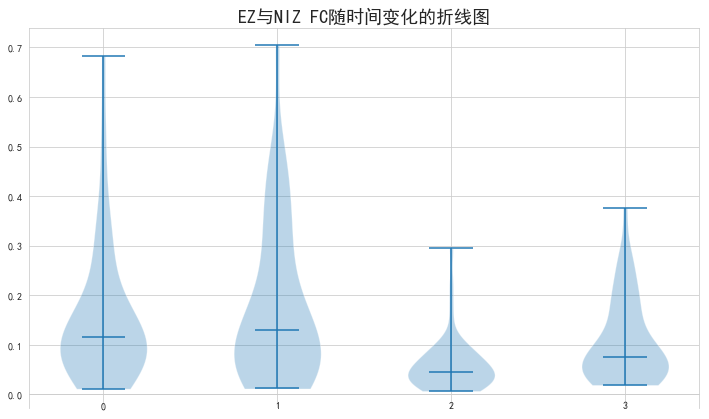

In [436]:
plt.figure(figsize=(12,7))
plt.violinplot([ez_niz_t0_1[1][0][0],ez_niz_t0_1[1][1][0],ez_niz_t0_1[1][2][0],ez_niz_t0_1[1][3][0]],showmedians=True) # data里是元素（如data1）还不允许是Series
#plt.scatter('01',pz[0])
ax=plt.gca()
ax.spines['bottom'].set_position(('data',0)) 
plt.title('EZ与NIZ FC随时间变化的折线图',fontsize=18)
plt.xticks(range(1,5),['0','1','2','3'])  # 只能这么设置label
#plt.yticks([i/10 for i in range(0,11)])
plt.show()

In [397]:
ez_niz_t0_1[3]

0.09607392702464962

In [398]:
pz_niz_t0_1 = H2_bwt([s46_47 ,s47_48 ,s49_50],[s104_105 ,s105_106 ,s106_107],649,45,sampleFreq,maxlag=0.001)

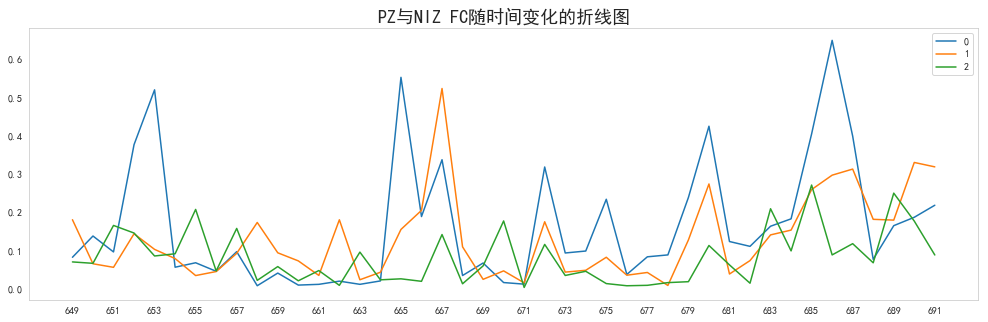

In [399]:
plt.figure(figsize=(17,5))
for i in range(len(pz_niz_t0_1[1])):
    plt.plot(pz_niz_t0_1[1][i][0],label=i)
plt.xticks(np.linspace(0,42,22),np.linspace(649,649+42,22,dtype=int))
plt.legend()
plt.title('PZ与NIZ FC随时间变化的折线图',fontsize=18)
plt.grid()

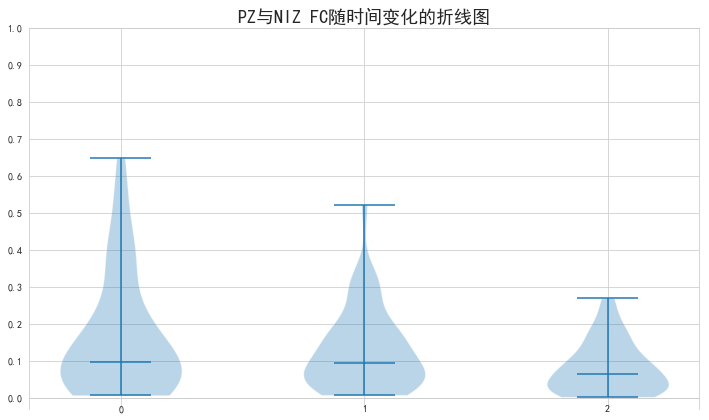

In [401]:
plt.figure(figsize=(12,7))
plt.violinplot([pz_niz_t0_1[1][0][0],pz_niz_t0_1[1][1][0],pz_niz_t0_1[1][2][0]],showmedians=True) # data里是元素（如data1）还不允许是Series
#plt.scatter('01',pz[0])
ax=plt.gca()
ax.spines['bottom'].set_position(('data',0)) 
plt.title('PZ与NIZ FC随时间变化的折线图',fontsize=18)
plt.xticks(range(1,4),['0','1','2'])  # 只能这么设置label
plt.yticks([i/10 for i in range(0,11)])
plt.show()

In [403]:
pz_niz_t0_1[2]

[0.09619242378940607, 0.09320470147273496, 0.06573000198405488]

In [ ]:
plt.figure(figsize=(12,7))
plt.violinplot([ez_gather,pz_gather,niz_gather,]) # data里是元素（如data1）还不允许是Series
plt.boxplot([ez_gather,pz_gather,niz_gather],widths=0.01,patch_artist=True,boxprops={'color':'k','facecolor':'k'},showcaps=False,\
             showmeans=False,meanprops={'markerfacecolor':'b'},showfliers=False,medianprops={'color':'k'})
plt.scatter(range(1,4),[read_data['EZ_median'][0][0],read_data['PZ_median'][0][0],read_data['NIZ_median'][0][0]],color='r')
#plt.scatter('01',pz[0])
ax=plt.gca()
ax.spines['bottom'].set_position(('data',0)) 
plt.title('癫痫发作时期FC小提琴图',fontsize=18)
plt.xticks([y+1 for y in range(3)],['EZ','PZ','NIZ'])  # 只能这么设置label
plt.yticks([y/10 for y in range(11)]) 
plt.show()

In [404]:
def EPdistance(p1,p2):
    '''
    p1与p2是两个三维坐标点
    '''
    return ((p1[0]-p2[0])**2+(p1[1]-p2[1])**2+(p1[2]-p2[2])**2)**0.5

In [406]:
EPdistance([-0.756950,-3.988354,6.734070],[-0.956969 ,-3.941508, 7.017439])

0.3500001974828018